In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd 
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# [Problem 1] Select features and categories for practice

In [3]:
d = load_iris()
x = pd.DataFrame(data = d['data'],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data = d['target'],columns=['Species'])

df = pd.concat([x, y], axis=1)
df = df[(df["Species"] == 1) | (df["Species"] == 2)]
df = df.loc[: , ["sepal_length" , "petal_length" , "Species"]]

print(df.shape)
display(df)

(100, 3)


,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   Species       100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.7 KB


In [5]:
df.isnull().sum()

sepal_length    0
petal_length    0
Species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


# [Problem 2] Data analysis

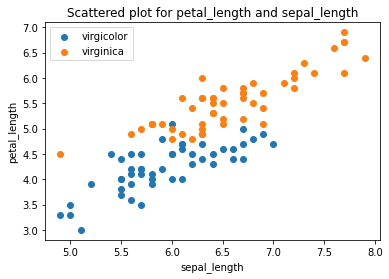

In [7]:
plt.scatter(df["sepal_length"][df["Species"] == 1].values, df["petal_length"][df["Species"] == 1].values , label = "virgicolor")
plt.scatter(df["sepal_length"][df["Species"] == 2].values, df["petal_length"][df["Species"] == 2].values , label = "virginica")
plt.title("Scattered plot for petal_length and sepal_length")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

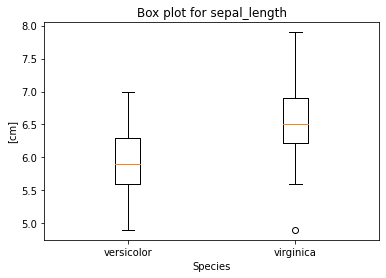

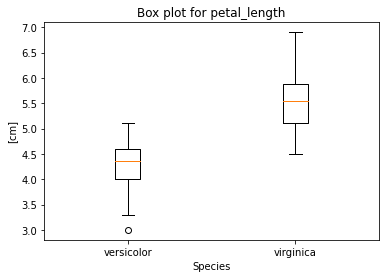

In [8]:
features = ["sepal_length" , "petal_length"]
for feature in features:
    plt.boxplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2] , d.target_names[1:])
    plt.title("Box plot for {}".format(feature))
    plt.xlabel("Species")
    plt.ylabel("[cm]")
    plt.show()

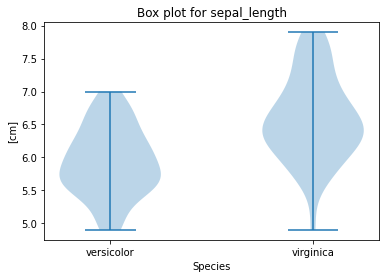

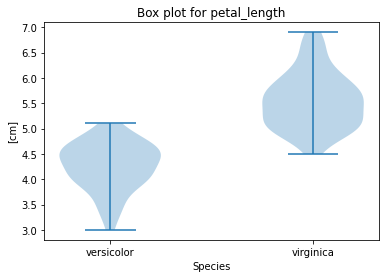

In [9]:
features = ["sepal_length" , "petal_length"]
for feature in features:
    plt.violinplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2] , d.target_names[1:])
    plt.title("Box plot for {}".format(feature))
    plt.xlabel("Species")
    plt.ylabel("[cm]")
    plt.show()

# [Problem 3] Division of preprocessing/training data and verification data

In [10]:
X = df.iloc[: , [0,1]].values
Y = df.iloc[: , 2].values

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.25, random_state=42)

print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_test.shape)


(25, 2)
(25,)
(75, 2)
(25,)


# [Problem 4] Pretreatment/Standardization

In [11]:
X_train_trans = StandardScaler().fit_transform(X_train)
X_test_trans = StandardScaler().fit_transform(X_test)

display(X_test_trans)
display(X_train_trans)

array([[ 0.15233458,  0.45032609],
       [ 0.15233458,  1.12045419],
       [ 1.145821  ,  1.25447982],
       [-0.84115184, -0.7559045 ],
       [-1.00673291, -0.7559045 ],
       [-1.17231398, -1.02395575],
       [ 0.15233458,  0.18227484],
       [ 1.97372635,  1.7905823 ],
       [-2.00021932, -1.69408385],
       [ 1.31140207, -0.0857764 ],
       [-0.01324649, -0.35382764],
       [-1.17231398, -1.29200699],
       [ 0.15233458,  0.18227484],
       [-0.34440863,  0.45032609],
       [ 0.81465886,  1.12045419],
       [ 0.48349672, -0.21980202],
       [-0.01324649,  0.04824922],
       [-0.17882756,  0.18227484],
       [-0.34440863, -1.02395575],
       [-1.17231398, -1.42603261],
       [ 2.30488849,  2.46071041],
       [-0.34440863,  0.04824922],
       [ 0.98023993,  0.04824922],
       [-0.67557077, -1.02395575],
       [-0.34440863,  0.31630047]])

array([[ 0.62124015, -0.65893772],
       [-1.15373171, -0.65893772],
       [ 0.02958286,  0.05557306],
       [-1.59747467, -1.25436337],
       [ 2.10038336,  2.08002027],
       [-0.56207442, -0.89710798],
       [-0.11833146, -0.77802285],
       [ 2.10038336,  1.36550949],
       [-0.4141601 , -0.53985259],
       [ 0.76915447,  1.12733923],
       [-0.85790306, -0.53985259],
       [ 0.32541151,  0.65099871],
       [ 0.17749719,  0.41282845],
       [-0.4141601 , -0.53985259],
       [-1.00581738, -0.53985259],
       [-0.85790306, -1.01619311],
       [-1.30164603, -0.53985259],
       [-2.04121763, -1.96887414],
       [ 0.62124015,  0.29374332],
       [ 0.62124015,  0.05557306],
       [-1.00581738, -1.25436337],
       [ 2.396212  ,  1.72276488],
       [ 0.47332583, -0.65893772],
       [ 0.76915447,  0.65099871],
       [-0.26624578, -0.30168233],
       [ 0.17749719, -0.77802285],
       [-1.15373171, -1.13527824],
       [-0.70998874, -1.01619311],
       [-1.00581738,

# [Problem 5] Learning and estimation

In [12]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_trans , Y_train)
knn_3.fit(X_train_trans , Y_train)
knn_5.fit(X_train_trans , Y_train)

Y_predict_1 = knn_1.predict(X_test_trans)
Y_predict_3 = knn_3.predict(X_test_trans)
Y_predict_5 = knn_5.predict(X_test_trans)

print(Y_predict_1)
print(Y_predict_3)
print(Y_predict_5)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]


# [Problem 6] Evaluation

In [13]:
predictions = [Y_predict_3, Y_predict_5, Y_predict_1]
keys = ["3-nn","5-nn","1-nn"]

for index, prediction in enumerate(predictions,0):
    print("--------------------------------------------------------")
    print(keys[index], "model")
    print("--------------------------------------------------------")
    print("Accuracy:", accuracy_score(y_true=Y_test, y_pred=prediction))
    print("Precision:", precision_score(y_true=Y_test, y_pred=prediction,average=None))    
    print("Recall:", recall_score(y_true=Y_test, y_pred=prediction,average=None))  
    print("F1 score:", f1_score(y_true=Y_test, y_pred=prediction,average=None)) 
    print("Confusion matrix:")
    print(confusion_matrix(y_true=Y_test, y_pred=prediction)) 
    print("")
    print("")

--------------------------------------------------------
3-nn model
--------------------------------------------------------
Accuracy: 0.88
Precision: [0.92307692 0.83333333]
Recall: [0.85714286 0.90909091]
F1 score: [0.88888889 0.86956522]
Confusion matrix:
[[12  2]
 [ 1 10]]


--------------------------------------------------------
5-nn model
--------------------------------------------------------
Accuracy: 0.84
Precision: [0.91666667 0.76923077]
Recall: [0.78571429 0.90909091]
F1 score: [0.84615385 0.83333333]
Confusion matrix:
[[11  3]
 [ 1 10]]


--------------------------------------------------------
1-nn model
--------------------------------------------------------
Accuracy: 0.92
Precision: [1.         0.84615385]
Recall: [0.85714286 1.        ]
F1 score: [0.92307692 0.91666667]
Confusion matrix:
[[12  2]
 [ 0 11]]




<blockquote>
$\textbf{Accuracy} = \dfrac{\texttt{N}_\texttt{Positve}}{\texttt{N}_\texttt{Samples}}$. This shows the model's ability to correctly label each entry. <br>
Example: Of all the people, how many deaths and survivals are correctly predicted? <br><br>
$\textbf{Precision} = \dfrac{\texttt{True Positive}}{\texttt{True Positive + False Positive}}$. This shows the (average) correctness of each label.<br>
Example: Of all the people predicted alive (dead), how many were actually alive (dead)? ($P(X=\textbf{Alive}|X_{\texttt{pred}}=\textbf{Alive})$) <br><br>
$\textbf{Recall} = \dfrac{\texttt{True Positive}}{\texttt{True Postive + False Negative}}$. This metric shows the model's (average) ability to correctly label each label. <br>
Example: Of all the survivals (deaths), how many survivals (deaths) are correctly predicted? ($P(X_{\texttt{pred}}=\textbf{Alive}|X=\textbf{Alive})$) <br><br>
$\dfrac{1}{\textbf{F1 score}} =  \dfrac{1}{2} * \left(\dfrac{1}{\texttt{Precision}} + \dfrac{1}{\texttt{Recall}}\right)$. $\textbf{F1}$ Score is the weighted average of $\texttt{Precision}$ and $\texttt{Recall}$.<br><br><br>

Given that <strong>True / False</strong> is the correctness of the prediction and <strong>Positive / Negative</strong> is the prediction.

# [Problem 7] Visualization

In [14]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

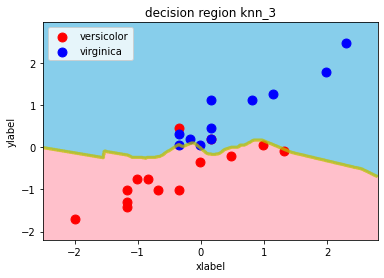

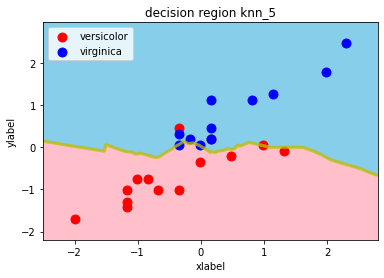

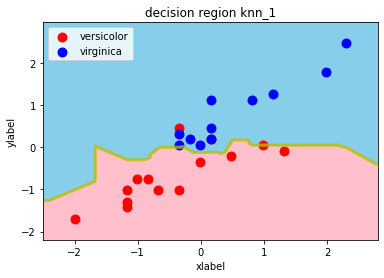

In [15]:
models = [knn_3, knn_5, knn_1]
models_name = ['knn_3', 'knn_5', 'knn_1']
for i,model in enumerate(models):
    decision_region(X_test_trans, Y_test, model, title='decision region {}'.format(models_name[i]))

# [Problem 8] Learning by other methods

In [16]:
def print_info(model_name, verbose=True):
    if model_name == "KNN-5":
        model = KNeighborsClassifier(n_neighbors=5).fit(X_train_trans, Y_train)
    elif model_name == "Logistic Regression":
        model = LogisticRegression().fit(X_train_trans, Y_train)
    elif model_name == "SVM":
        model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_trans, Y_train)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=0).fit(X_train_trans, Y_train)
    else:
        model = RandomForestClassifier().fit(X_train_trans, Y_train)
    prediction = model.predict(X_test_trans)
    accuracy = accuracy_score(y_true=Y_test, y_pred=prediction)
    precision = precision_score(y_true=Y_test, y_pred=prediction)
    recall = recall_score(y_true=Y_test, y_pred=prediction)
    f1 = f1_score(y_true=Y_test, y_pred=prediction)
    if verbose:
        print("-"*30, "Statistics for", model_name, "model", "-"*30)
        print("Accuracy =", accuracy)
        print("Precision =", precision)    
        print("Recall =", recall)  
        print("F1 score =", f1) 
        print("confusion matrix =\n{}".format(confusion_matrix(y_true=Y_test, y_pred=prediction)))
        decision_region(X_test_trans, Y_test, model, title='Decision region for {} model'.format(model_name))
    return (accuracy, precision, recall, f1)

- Logistic Regression model

------------------------------ Statistics for Logistic Regression model ------------------------------
Accuracy = 0.92
Precision = 1.0
Recall = 0.8571428571428571
F1 score = 0.923076923076923
confusion matrix =
[[12  2]
 [ 0 11]]


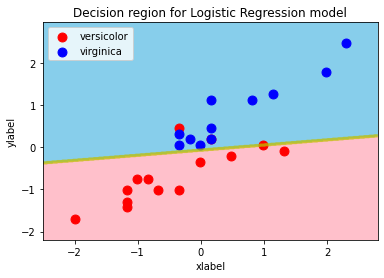

In [17]:
model_name = "Logistic Regression"
prediction, precision, recall, f1 = print_info(model_name)

- Support Vector Machine (SVM)

------------------------------ Statistics for KNeighborsClassifier(n_neighbors=1) model ------------------------------
Accuracy = 0.92
Precision = 1.0
Recall = 0.8571428571428571
F1 score = 0.923076923076923
confusion matrix =
[[12  2]
 [ 0 11]]


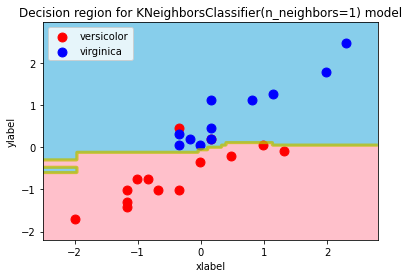

In [18]:
model_name = "SVM"
prediction, precision, recall, f1 = print_info(model, model_name)

- Decision Tree

------------------------------ Statistics for KNeighborsClassifier(n_neighbors=1) model ------------------------------
Accuracy = 0.92
Precision = 1.0
Recall = 0.8571428571428571
F1 score = 0.923076923076923
confusion matrix =
[[12  2]
 [ 0 11]]


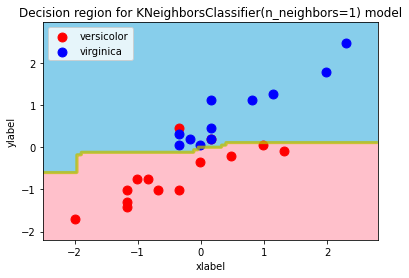

In [19]:
model_name = "Decision Tree"
prediction, precision, recall, f1 = print_info(model, model_name)

- Random Forest

------------------------------ Statistics for KNeighborsClassifier(n_neighbors=1) model ------------------------------
Accuracy = 0.92
Precision = 1.0
Recall = 0.8571428571428571
F1 score = 0.923076923076923
confusion matrix =
[[12  2]
 [ 0 11]]


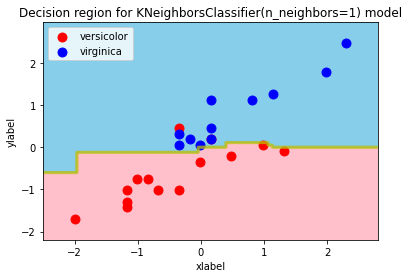

In [20]:
model_name = "Random Forest"
prediction, precision, recall, f1 = print_info(model, model_name)

In [21]:
model_name_list = ["KNN-5","Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
info = []
for model_name in model_name_list:
    info.append(print_info(model_name, verbose=False))

In [22]:
df = pd.DataFrame(data=info, columns=["Accuracy", "Precision", "Recall", "F1 score"], index=model_name_list)
display(df)

,Accuracy,Precision,Recall,F1 score
KNN-5,0.84,0.916667,0.785714,0.846154
Logistic Regression,0.92,1.000000,0.857143,0.923077
SVM,0.88,1.000000,0.785714,0.880000
Decision Tree,0.92,1.000000,0.857143,0.923077
Random Forest,0.92,1.000000,0.857143,0.923077


<blockquote>
    The $\textbf{Logistic Regression}$ model gives the best overall statistics.
</blockquote>

# [Problem 9] (Advanced task) Comparison with and without standardization

In [30]:
def print_info_raw(model_name, verbose=True):
    if model_name == "KNN-5":
        model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
    elif model_name == "Logistic Regression":
        model = LogisticRegression().fit(X_train, Y_train)
    elif model_name == "SVM":
        model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, Y_train)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)
    else:
        model = RandomForestClassifier().fit(X_train, Y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_true=Y_test, y_pred=prediction)
    precision = precision_score(y_true=Y_test, y_pred=prediction)
    recall = recall_score(y_true=Y_test, y_pred=prediction)
    f1 = f1_score(y_true=Y_test, y_pred=prediction)
    if verbose:
        print("-"*30, "Statistics for", model_name, "model", "-"*30)
        print("Accuracy =", accuracy)
        print("Precision =", precision)    
        print("Recall =", recall)  
        print("F1 score =", f1) 
        print("confusion matrix =\n{}".format(confusion_matrix(y_true=Y_test, y_pred=prediction)))
        decision_region(X_test_trans, Y_test, model, title='Decision region for {} model'.format(model_name))
    return (accuracy, precision, recall, f1)

In [31]:
model_name_list = ["KNN-5","Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
info = []
for model_name in model_name_list:
    info.append(print_info_raw(model_name, verbose=False))

In [25]:
df_2 = pd.DataFrame(data=info, columns=["Accuracy", "Precision", "Recall", "F1 score"], index=model_name_list)
display(df_2)

,Accuracy,Precision,Recall,F1 score
KNN-5,0.80,0.764706,0.928571,0.838710
Logistic Regression,0.84,0.857143,0.857143,0.857143
SVM,0.84,0.857143,0.857143,0.857143
Decision Tree,0.84,0.812500,0.928571,0.866667
Random Forest,0.84,0.812500,0.928571,0.866667


#  [Problem 10] (Advance task) Highly accurate method using all objective variables

In [28]:
def decision_region_multi(X, y, model, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica','setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [47]:
def print_info_multi(model_name, verbose=True, average=None):
    if model_name == "KNN-5":
        model = KNeighborsClassifier(n_neighbors=5).fit(X_train_trans, Y_train)
    elif model_name == "Logistic Regression":
        model = LogisticRegression().fit(X_train_trans, Y_train)
    elif model_name == "SVM":
        model = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_trans, Y_train)
    elif model_name == "Decision Tree":
        model = DecisionTreeClassifier(random_state=0).fit(X_train_trans, Y_train)
    else:
        model = RandomForestClassifier().fit(X_train_trans, Y_train)
    prediction = model.predict(X_test_trans)
    accuracy = accuracy_score(y_true=Y_test, y_pred=prediction)
    precision = precision_score(y_true=Y_test, y_pred=prediction, average=average)
    recall = recall_score(y_true=Y_test, y_pred=prediction, average=average)
    f1 = f1_score(y_true=Y_test, y_pred=prediction, average=average)
    if verbose:
        print("-"*30, "Statistics for", model_name, "model", "-"*30)
        print("Accuracy =", accuracy)
        print("Precision =", precision)    
        print("Recall =", recall)  
        print("F1 score =", f1) 
        print("confusion matrix =\n{}".format(confusion_matrix(y_true=Y_test, y_pred=prediction)))
        decision_region_multi(X_test_trans, Y_test, model, title='Decision region for {} model'.format(model_name))
    return (accuracy, precision, recall, f1)

In [48]:
d = load_iris()

x = pd.DataFrame(data = d['data'],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = pd.DataFrame(data = d['target'],columns=['Species'])

df = pd.concat([x, y], axis=1)
df = df.loc[: , ["sepal_length" , "petal_length" , "Species"]]

X = df.iloc[: , [0,1]].values
y = df.iloc[: , 2].values

X_train , X_test , Y_train , Y_test = train_test_split(X , y , test_size = 0.25, random_state=42)

X_train_trans = StandardScaler().fit_transform(X_train)
X_test_trans = StandardScaler().fit_transform(X_test)

# k_neigh_5_2 = KNeighborsClassifier(n_neighbors=5)
# k_neigh_5_2.fit(X_train_trans, y_train)
# pred_5_2 = k_neigh_5_2.predict(X_test_trans)

# lr = LogisticRegression().fit(X_train_trans, y_train)
# prediction_lr = lr.predict(X_test_trans)

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_trans, y_train)
# prediction_svc = clf.predict(X_test_trans)

# dtc = DecisionTreeClassifier(random_state=0).fit(X_train_trans, y_train)
# prediction_dtc = dtc.predict(X_test_trans)

# rfc = RandomForestClassifier().fit(X_train_trans, y_train)
# prediction_rfc = rfc.predict(X_test_trans)

------------------------------ Statistics for KNN-5 model ------------------------------
Accuracy = 0.9736842105263158
Precision = 0.9736842105263158
Recall = 0.9736842105263158
F1 score = 0.9736842105263158
confusion matrix =
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


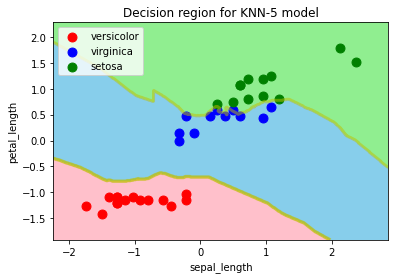

------------------------------ Statistics for Logistic Regression model ------------------------------
Accuracy = 0.9736842105263158
Precision = 0.9736842105263158
Recall = 0.9736842105263158
F1 score = 0.9736842105263158
confusion matrix =
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


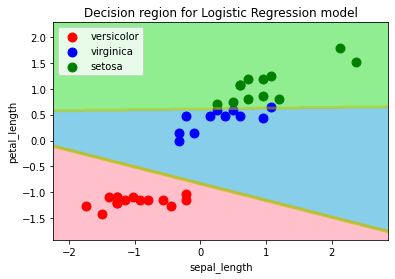

------------------------------ Statistics for SVM model ------------------------------
Accuracy = 0.9736842105263158
Precision = 0.9736842105263158
Recall = 0.9736842105263158
F1 score = 0.9736842105263158
confusion matrix =
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


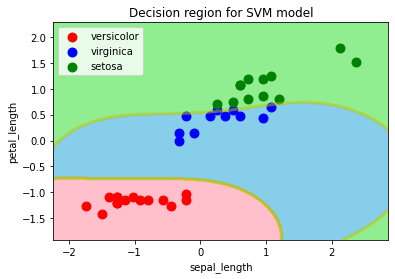

------------------------------ Statistics for Decision Tree model ------------------------------
Accuracy = 0.9473684210526315
Precision = 0.9473684210526315
Recall = 0.9473684210526315
F1 score = 0.9473684210526315
confusion matrix =
[[15  0  0]
 [ 0  9  2]
 [ 0  0 12]]


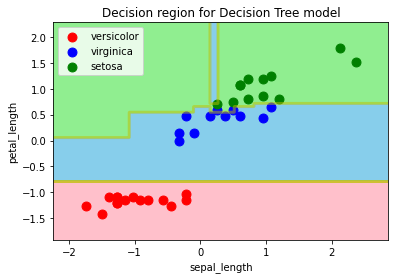

------------------------------ Statistics for Random Forest model ------------------------------
Accuracy = 0.9473684210526315
Precision = 0.9473684210526315
Recall = 0.9473684210526315
F1 score = 0.9473684210526315
confusion matrix =
[[15  0  0]
 [ 0  9  2]
 [ 0  0 12]]


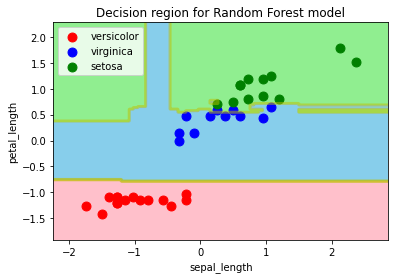

In [49]:
model_name_list = ["KNN-5","Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
info = []
for model_name in model_name_list:
    info.append(print_info_multi(model_name, verbose=True, average='micro'))

In [50]:
df_2 = pd.DataFrame(data=info, columns=["Accuracy", "Precision", "Recall", "F1 score"], index=model_name_list)
display(df_2)

,Accuracy,Precision,Recall,F1 score
KNN-5,0.973684,0.973684,0.973684,0.973684
Logistic Regression,0.973684,0.973684,0.973684,0.973684
SVM,0.973684,0.973684,0.973684,0.973684
Decision Tree,0.947368,0.947368,0.947368,0.947368
Random Forest,0.947368,0.947368,0.947368,0.947368
